<a href="https://colab.research.google.com/github/rhs329/boostcourse-2-/blob/main/1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [30]:
df=pd.read_csv("/content/diabetes.csv")
df.shape

(768, 9)

In [31]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [32]:
split_count = int(df.shape[0] * 0.8)
split_count

614

In [33]:
train = df[:split_count].copy()
train.shape

(614, 9)

In [34]:
test = df[split_count:].copy()
test.shape

(154, 9)

In [35]:
feature_names = train.columns[:-1].tolist()
feature_names

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [36]:
label_name = train.columns[-1]
label_name

'Outcome'

In [37]:
X_train = train[feature_names]
print(X_train.shape)
X_train.head()

(614, 8)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [38]:
y_train = train[label_name]
print(y_train.shape)
y_train.head()

(614,)


,Outcome
0,1
1,0
2,1
3,0
4,1


In [39]:
X_test = test[feature_names]
print(X_test.shape)
X_test.head()

(154, 8)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
614,11,138,74,26,144,36.1,0.557,50
615,3,106,72,0,0,25.8,0.207,27
616,6,117,96,0,0,28.7,0.157,30
617,2,68,62,13,15,20.1,0.257,23
618,9,112,82,24,0,28.2,1.282,50


In [40]:
y_test = test[label_name]
print(y_test.shape)
y_test.head()

(154,)


,Outcome
614,1
615,0
616,0
617,0
618,1


In [41]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model

DecisionTreeClassifier()

In [42]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [43]:
y_predict = model.predict(X_test)
y_predict[:5]

array([1, 0, 1, 0, 1])

[Text(0.5705341940976163, 0.9705882352941176, 'Glucose <= 154.5\ngini = 0.453\nsamples = 614\nvalue = [401, 213]'),
 Text(0.1881739500567537, 0.9117647058823529, 'BMI <= 26.35\ngini = 0.385\nsamples = 518\nvalue = [383, 135]'),
 Text(0.37935407207718497, 0.9411764705882353, 'True  '),
 Text(0.036322360953461974, 0.8529411764705882, 'Glucose <= 124.5\ngini = 0.061\nsamples = 128\nvalue = [124, 4]'),
 Text(0.018161180476730987, 0.7941176470588235, 'DiabetesPedigreeFunction <= 0.675\ngini = 0.019\nsamples = 105\nvalue = [104, 1]'),
 Text(0.009080590238365494, 0.7352941176470589, 'gini = 0.0\nsamples = 87\nvalue = [87, 0]'),
 Text(0.02724177071509648, 0.7352941176470589, 'DiabetesPedigreeFunction <= 0.705\ngini = 0.105\nsamples = 18\nvalue = [17, 1]'),
 Text(0.018161180476730987, 0.6764705882352942, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.036322360953461974, 0.6764705882352942, 'gini = 0.0\nsamples = 17\nvalue = [17, 0]'),
 Text(0.05448354143019296, 0.7941176470588235, 'BMI <= 

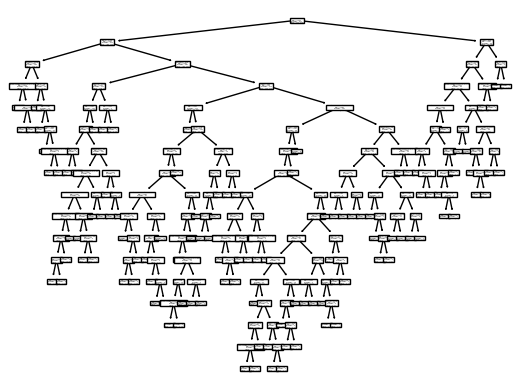

In [44]:
from sklearn.tree import plot_tree

plot_tree(model, feature_names=feature_names)

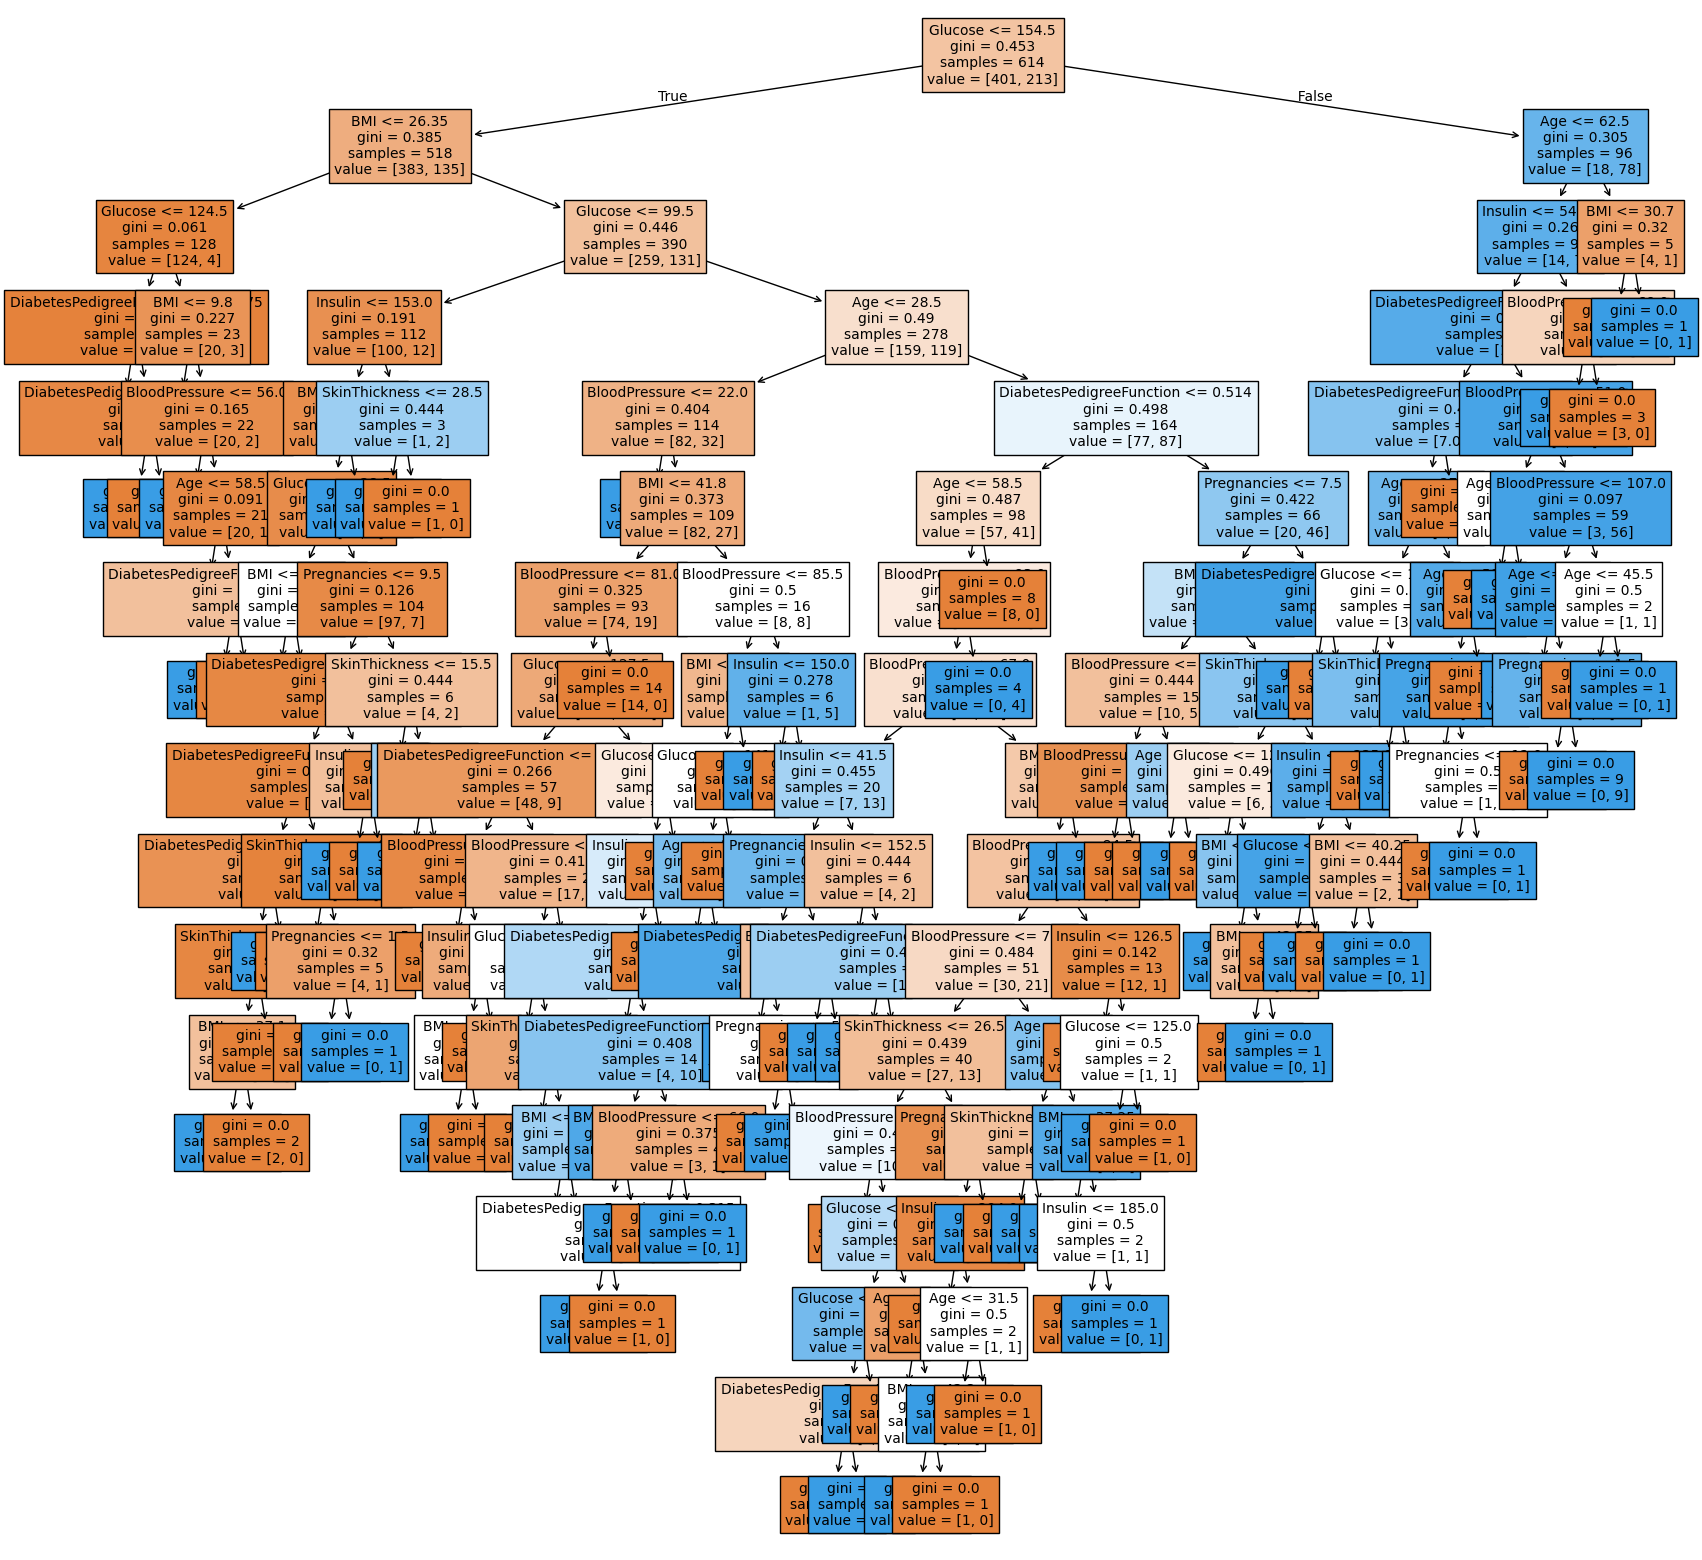

In [45]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 20))
tree = plot_tree(model, feature_names=feature_names,
                         filled=True,
                         fontsize=10)

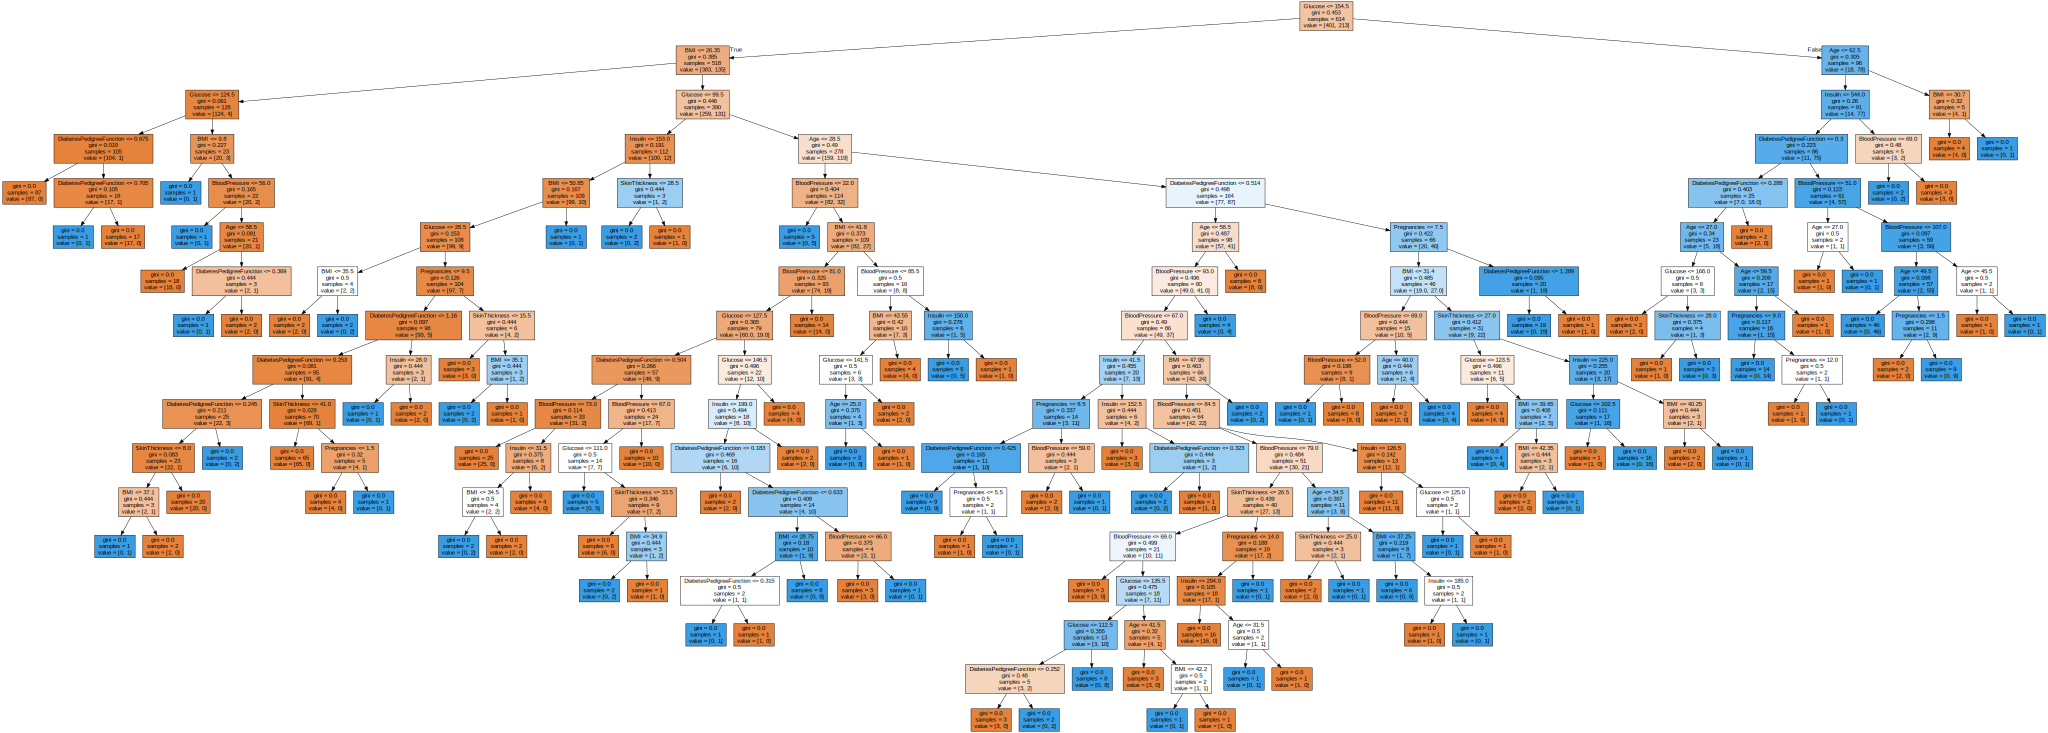

In [46]:
import graphviz
from sklearn.tree import export_graphviz

dot_tree = export_graphviz(model, feature_names = feature_names,
filled=True)
graphviz.Source(dot_tree)

In [47]:
model.feature_importances_

array([0.05598564, 0.32173007, 0.13374443, 0.05011687, 0.06145171,
       0.16388649, 0.11044729, 0.1026375 ])

<Axes: >

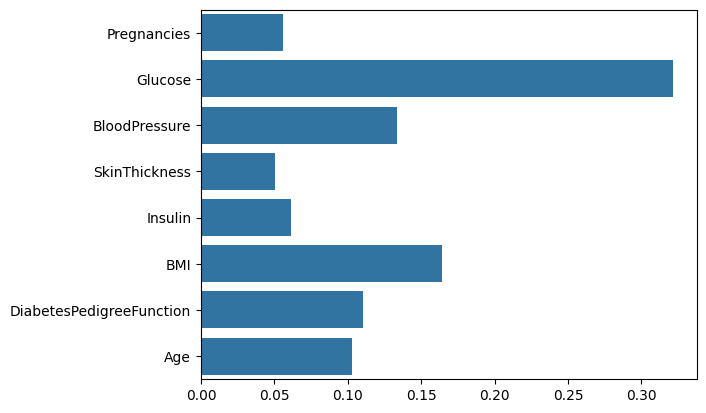

In [48]:
sns.barplot(x=model.feature_importances_, y=feature_names)

In [49]:
diff_count = abs(y_test - y_predict).sum()
diff_count

np.int64(38)

In [50]:
y_test == y_predict

,Outcome
614,True
615,True
616,False
617,True
618,True
...,...
763,True
764,True
765,True
766,True


In [51]:
abs(y_test - y_predict).sum() / len(y_test)

np.float64(0.24675324675324675)

In [53]:
(len(y_test) - diff_count) / len(y_test) * 100

np.float64(75.32467532467533)

In [54]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predict)

0.7532467532467533

In [55]:
model.score(X_test, y_test) * 100

75.32467532467533